In [ ]:
"""
Filter:
-In computer vision, a filter is a mathematical operation that is applied to an image to transform it in some way. Filters are used to 
 extract information from images, enhance features, remove noise, and prepare images for further processing 
-A filter refers to a mathematical operation applied to an image to enhance or modify certain characteristics. These operations are typically 
 performed using convolution, a process where a small matrix, known as a kernel or filter, is applied to the input image. The convolution operation 
 involves sliding the kernel over the image pixel by pixel and computing a weighted sum of the values in the overlapping region.


Types of Filters:

There are many different types of filters used in computer vision, each with a specific purpose. Some common filters include:

    Gaussian filter: smooths an image by removing high-frequency noise.
    Sobel filter: detects edges in an image by computing the gradient of the image in the horizontal and vertical directions.
    Laplacian filter: detects changes in intensity in an image by computing the second derivative of the image.
    Median filter: removes noise from an image by replacing each pixel with the median value of its neighboring pixels.
    Bilateral filter: smooths an image while preserving edges

"""

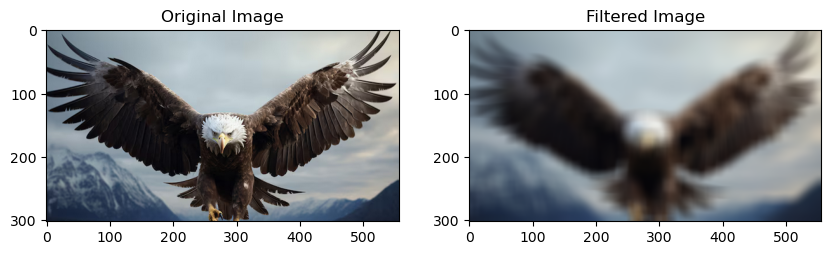

In [1]:
"""Moving Averages"""
import cv2
import numpy as np
import matplotlib.pyplot as plt
def moving_average_2d(image, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)
    result = cv2.filter2D(image, -1, kernel)
    return result
d_path = r"C:\Users\BhavyeBhasin\Downloads\SS_007.png"
original_image = cv2.imread(d_path)
# Apply the moving average filter
filtered_image = moving_average_2d(original_image, kernel_size=20)
# Display the original and filtered images using matplotlib
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))
plt.title('Filtered Image')
plt.show()


In [ ]:
"""
How to remove Noise from image (Moving average)
-Moving average is a commonly used technique in signal processing and time series analysis. It is used to smooth out a sequence of data points by 
 calculating the average of a fixed number of consecutive points.

-The basic idea behind moving average is to reduce noise and fluctuations in the data, making it easier to identify trends and patterns. 
 It is particularly useful when dealing with data that contains random variations or short-term fluctuations.

-To calculate a moving average, you need to specify the window size, which is the number of data points to be included in the average calculation. 
 For example, if you have a window size of 3, you would take the average of the current data point and the two previous data points.

Here’s a step-by-step example to help illustrate the concept:
Let’s say we have a sequence of data points: [10, 15, 12, 18, 20, 17, 14, 16, 19, 13].
If we choose a window size of 3, we start by calculating the average of the first three data points: (10 + 15 + 12) / 3 = 12.33.
We then slide the window by one data point and calculate the average of the next three data points: (15 + 12 + 18) / 3 = 15.
We continue this process until we reach the end of the data sequence, calculating the average for each window.
The resulting moving average sequence would be: [12.33, 15, 16.33, 18, 18.33, 17, 15.67, 16.33, 16.67, 16].
By using a moving average, we can see that the fluctuations in the data are smoothed out, making it easier to observe the overall trend. 
It can be a useful tool for analyzing data and making predictions.


Assumptions:
-The first assumption is that the real value of a pixel is probably similar to the values nearby.
-Assuming that each noise that’s been added to each pixel is independent of the noise that’s been added to all the other pixels.
"""

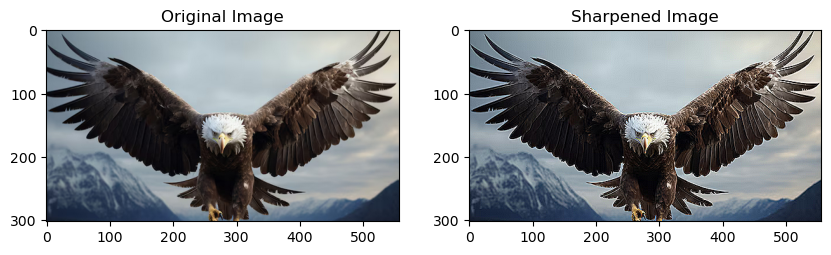

'\nIn this code, I’ve defined a sharpening kernel and used the cv2.filter2D() function to apply this \nkernel to the image. The sharpening kernel enhances the edges and details in the image, making it \nappear sharper.\n'

In [2]:
"""Sharpening filter"""
import cv2
import numpy as np
import matplotlib.pyplot as plt

def sharpen_image(image):
    # Define the sharpening kernel
    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])
    # Apply the kernel to the image
    result = cv2.filter2D(image, -1, kernel)
    return result
d_path = r"C:\Users\BhavyeBhasin\Downloads\SS_007.png"
original_image = cv2.imread(d_path)
# Apply the sharpening filter
sharpened_image = sharpen_image(original_image)
# Display the original and sharpened images using matplotlib
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.title('Sharpened Image')
plt.show()
"""
In this code, I’ve defined a sharpening kernel and used the cv2.filter2D() function to apply this 
kernel to the image. The sharpening kernel enhances the edges and details in the image, making it 
appear sharper.
"""

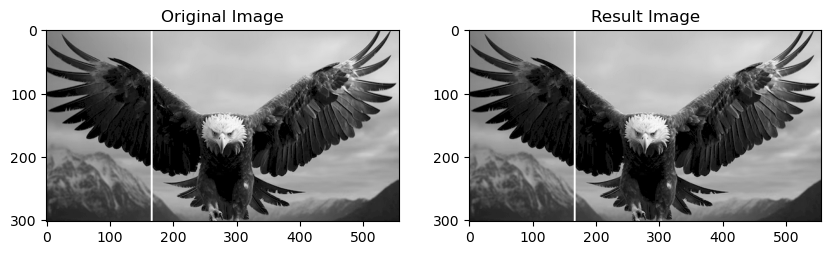

In [3]:
"""Correlation Filtering-Uniform weights"""
import cv2
import numpy as np
import matplotlib.pyplot as plt
def uniform_weight_correlation_filter(template, image):
    # Calculate the correlation using OpenCV's matchTemplate function
    correlation_result = cv2.matchTemplate(image, template, cv2.TM_CCORR_NORMED)
    # Extract the location of the maximum correlation value
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(correlation_result)
    # Draw a rectangle around the detected object
    h, w = template.shape
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(image, top_left, bottom_right, 255, 2)
    return image
# Load the image and template
d_path = r"C:\Users\BhavyeBhasin\Downloads\SS_007.png"
image = cv2.imread(d_path, cv2.IMREAD_GRAYSCALE)
b_path = r"C:\Users\BhavyeBhasin\Downloads\wolfss.png" 
template = cv2.imread(b_path, cv2.IMREAD_GRAYSCALE)

# Apply uniform weight correlation filtering
result_image = uniform_weight_correlation_filter(template, image)

# Display the original and result images using matplotlib
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(result_image, cmap='gray')
plt.title('Result Image')
plt.show()

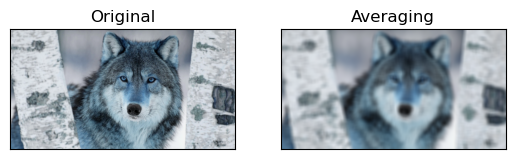

'\nNotes\n-Used to remove noise in images \n-As the kernel size increases example 15x15,the image loses its clarity \n'

In [4]:
"""averaging filter on images"""
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
image_path = r"C:\Users\BhavyeBhasin\Downloads\wolfss.png"
img = cv.imread(image_path)
kernel = np.ones((15,15),np.float32)/225
dst = cv.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()
"""
Notes
-Used to remove noise in images 
-As the kernel size increases example 15x15,the image loses its clarity 
"""

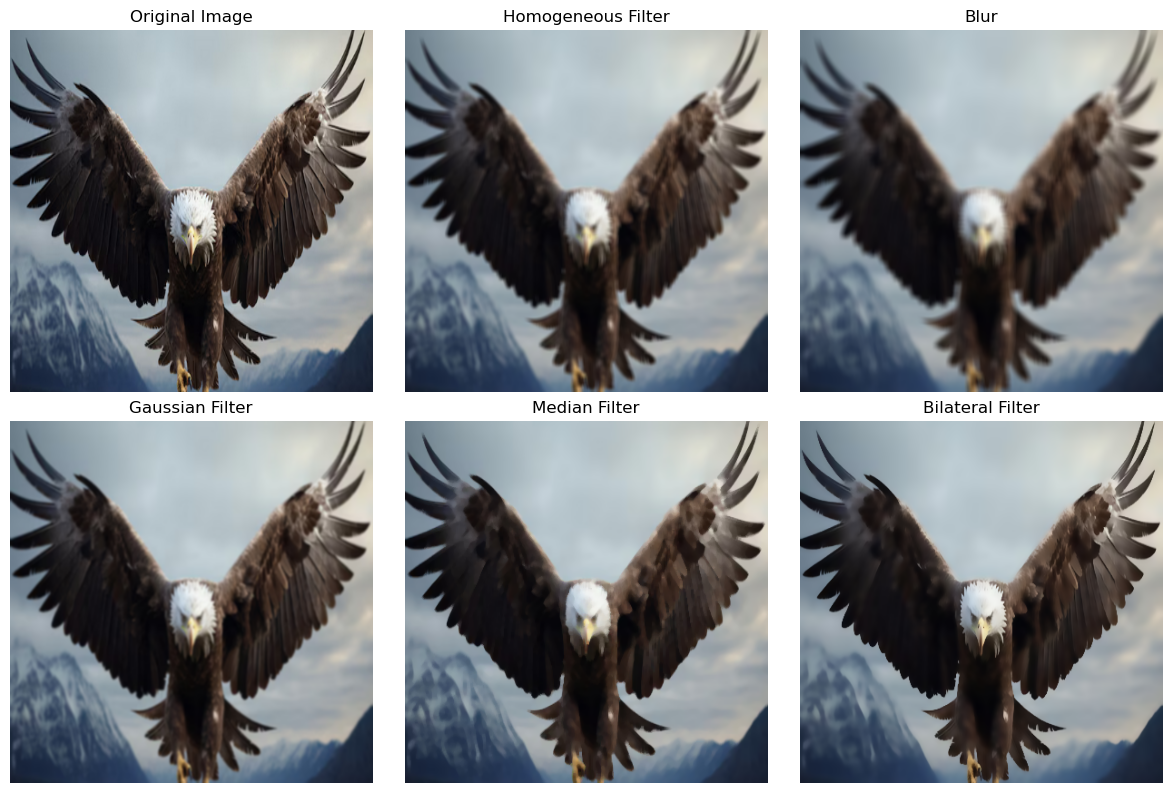

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread(r"C:\Users\BhavyeBhasin\Downloads\SS_007.png")
img = cv2.resize(img, (400, 400))

# Define a kernel for the homogeneous filter
kernel = np.ones((5, 5), np.float32) / 25

# Homogeneous filter
h_filter = cv2.filter2D(img, -1, kernel)

# Blur (averaging) filter
blur = cv2.blur(img, (8, 8))

# Gaussian filter
gau = cv2.GaussianBlur(img, (5, 5), 0)

# Median filter
med = cv2.medianBlur(img, 5)

# Bilateral filter
bi_f = cv2.bilateralFilter(img, 9, 75, 75)

# Display images using Matplotlib
plt.figure(figsize=(12, 8))

titles = ["Original Image", "Homogeneous Filter", "Blur", "Gaussian Filter", "Median Filter", "Bilateral Filter"]
images = [img, h_filter, blur, gau, med, bi_f]

for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()